In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_predict,StratifiedShuffleSplit,cross_validate,cross_validate,ShuffleSplit
from sklearn.decomposition import PCA

In [2]:
df_train = pd.read_csv("./data_train_frequency.csv")
df_train.drop(columns=["Unnamed: 0"],inplace=True)
df_train

,1,2,3,4,5,6,7,8,9,10,...,204,205,206,207,208,209,210,211,212,213
0,0.0,10.0,950.000000,1074.0,274.986868,782.0,-0.319753,-1.432466,325.821586,1.000000,...,1.000000,172.000000,10.000000,9.000000,252.222222,10656.395062,87.777778,10339.061728,135.800000,4315.560000
1,0.0,17.0,574.500000,582.0,104.913059,378.0,0.158313,-0.696295,336.569414,1.000000,...,0.882353,-15.000000,15.000000,4.000000,158.000000,3944.000000,73.000000,6555.000000,-1.066667,697.528889
2,3.0,16.0,593.600000,594.0,4.687572,18.0,0.396421,-0.312612,94.909877,1.000000,...,1.000000,-4.000000,16.000000,15.000000,122.400000,2058.773333,12.533333,1360.782222,95.500000,68.750000
3,3.0,23.0,420.090909,420.0,3.591772,12.0,-0.021014,-0.856142,254.059787,0.826087,...,0.739130,-9.000000,6.000000,4.000000,40.666667,1120.888889,5.333333,1504.888889,12.000000,1464.000000
4,1.0,9.0,1068.750000,1075.0,25.118469,76.0,-0.276816,-1.271399,461.130814,1.000000,...,1.000000,2.000000,9.000000,8.000000,122.000000,671.000000,19.750000,569.437500,136.444444,43.358025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8511,3.0,16.0,615.733333,596.0,51.114860,152.0,2.153820,2.645687,365.256750,1.000000,...,0.003757,0.022262,0.003757,0.003757,0.044242,0.044242,0.043021,0.043021,0.037385,0.037385
8512,1.0,9.0,1091.500000,1093.0,5.894913,18.0,-0.311206,-1.184514,358.414529,1.000000,...,0.888889,-3.000000,9.000000,8.000000,81.428571,1294.530612,-40.000000,1746.285714,155.333333,4722.666667
8513,2.0,15.0,654.428571,648.0,107.653355,458.0,0.475616,0.784000,180.045117,1.000000,...,1.000000,-4.000000,15.000000,14.000000,77.142857,2213.551020,-1.714286,2686.204082,104.000000,3602.666667
8514,1.0,9.0,1075.000000,1083.0,24.535688,66.0,-0.263431,-1.567800,251.455499,1.000000,...,1.000000,14.000000,9.000000,8.000000,101.142857,4933.551020,-10.750000,7259.937500,88.222222,202.172840


In [3]:
x_train = df_train.iloc[:,1:].values    
y_train = df_train.iloc[:,0].values

In [4]:
scale = MinMaxScaler()
x_train = scale.fit_transform(x_train)

In [5]:
df_test = pd.read_csv("./data_test_frequency.csv")
df_test.drop(columns=["Unnamed: 0"],inplace=True)
df_test

,0,1,2,3,4,5,6,7,8,9,...,203,204,205,206,207,208,209,210,211,212
0,0.0,14.0,710.769231,628.0,153.204817,556.0,0.996355,0.207174,459.037295,1.000000,...,0.928571,-10.000000,10.0,9.0,146.000000,729.000000,78.250000,3140.437500,127.600000,1041.440000
1,0.0,10.0,968.666667,894.0,266.399867,932.0,0.979352,0.388359,398.464564,1.000000,...,0.600000,64.000000,7.0,7.0,140.500000,15314.750000,-27.000000,5249.000000,112.285714,8081.632653
2,0.0,11.0,797.000000,780.0,251.329664,794.0,0.260470,-1.002325,340.802438,1.000000,...,1.000000,26.000000,9.0,7.0,154.285714,1944.489796,18.571429,8070.530612,131.111111,1078.320988
3,2.0,13.0,757.500000,755.0,8.986100,26.0,0.048579,-1.449012,412.324324,1.000000,...,1.000000,-4.000000,12.0,12.0,108.500000,6122.750000,46.500000,7081.416667,121.833333,264.305556
4,0.0,23.0,413.909091,409.0,82.344017,426.0,3.023659,10.404884,168.041577,0.956522,...,0.083333,0.022262,11.0,12.0,0.044242,0.044242,-50.000000,0.000000,45.818182,832.330579
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2125,1.0,9.0,1071.250000,1062.0,36.509417,118.0,1.263183,0.543003,364.303573,0.888889,...,0.777778,0.000000,9.0,8.0,342.857143,2843.265306,205.142857,11207.836735,96.000000,2281.142857
2126,1.0,8.0,1196.000000,1202.0,33.839959,102.0,-0.454057,-1.036905,181.876516,1.000000,...,1.000000,-26.000000,8.0,7.0,137.666667,228.555556,87.714286,14282.775510,169.142857,46.693878
2127,3.0,16.0,595.600000,590.0,23.734082,82.0,0.371174,-0.657132,137.696567,1.000000,...,1.000000,-8.000000,16.0,14.0,102.714286,1270.061224,7.285714,361.489796,90.400000,2186.240000
2128,1.0,8.0,1080.285714,996.0,180.470587,448.0,0.587475,-1.363827,561.988537,1.000000,...,1.000000,18.000000,8.0,5.0,62.400000,51.840000,-45.200000,0.960000,101.000000,5002.000000


In [6]:
df_test

,0,1,2,3,4,5,6,7,8,9,...,203,204,205,206,207,208,209,210,211,212
0,0.0,14.0,710.769231,628.0,153.204817,556.0,0.996355,0.207174,459.037295,1.000000,...,0.928571,-10.000000,10.0,9.0,146.000000,729.000000,78.250000,3140.437500,127.600000,1041.440000
1,0.0,10.0,968.666667,894.0,266.399867,932.0,0.979352,0.388359,398.464564,1.000000,...,0.600000,64.000000,7.0,7.0,140.500000,15314.750000,-27.000000,5249.000000,112.285714,8081.632653
2,0.0,11.0,797.000000,780.0,251.329664,794.0,0.260470,-1.002325,340.802438,1.000000,...,1.000000,26.000000,9.0,7.0,154.285714,1944.489796,18.571429,8070.530612,131.111111,1078.320988
3,2.0,13.0,757.500000,755.0,8.986100,26.0,0.048579,-1.449012,412.324324,1.000000,...,1.000000,-4.000000,12.0,12.0,108.500000,6122.750000,46.500000,7081.416667,121.833333,264.305556
4,0.0,23.0,413.909091,409.0,82.344017,426.0,3.023659,10.404884,168.041577,0.956522,...,0.083333,0.022262,11.0,12.0,0.044242,0.044242,-50.000000,0.000000,45.818182,832.330579
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2125,1.0,9.0,1071.250000,1062.0,36.509417,118.0,1.263183,0.543003,364.303573,0.888889,...,0.777778,0.000000,9.0,8.0,342.857143,2843.265306,205.142857,11207.836735,96.000000,2281.142857
2126,1.0,8.0,1196.000000,1202.0,33.839959,102.0,-0.454057,-1.036905,181.876516,1.000000,...,1.000000,-26.000000,8.0,7.0,137.666667,228.555556,87.714286,14282.775510,169.142857,46.693878
2127,3.0,16.0,595.600000,590.0,23.734082,82.0,0.371174,-0.657132,137.696567,1.000000,...,1.000000,-8.000000,16.0,14.0,102.714286,1270.061224,7.285714,361.489796,90.400000,2186.240000
2128,1.0,8.0,1080.285714,996.0,180.470587,448.0,0.587475,-1.363827,561.988537,1.000000,...,1.000000,18.000000,8.0,5.0,62.400000,51.840000,-45.200000,0.960000,101.000000,5002.000000


In [7]:
x_test = df_test.iloc[:,1:].values
y_test = df_test.iloc[:,0].values

In [8]:
x_test

array([[1.40000000e+01, 7.10769231e+02, 6.28000000e+02, ...,
        3.14043750e+03, 1.27600000e+02, 1.04144000e+03],
       [1.00000000e+01, 9.68666667e+02, 8.94000000e+02, ...,
        5.24900000e+03, 1.12285714e+02, 8.08163265e+03],
       [1.10000000e+01, 7.97000000e+02, 7.80000000e+02, ...,
        8.07053061e+03, 1.31111111e+02, 1.07832099e+03],
       ...,
       [1.60000000e+01, 5.95600000e+02, 5.90000000e+02, ...,
        3.61489796e+02, 9.04000000e+01, 2.18624000e+03],
       [8.00000000e+00, 1.08028571e+03, 9.96000000e+02, ...,
        9.60000000e-01, 1.01000000e+02, 5.00200000e+03],
       [2.50000000e+01, 3.91250000e+02, 3.90000000e+02, ...,
        4.30208529e-02, 3.73849333e-02, 3.73849333e-02]])

In [9]:
x_test = scale.transform(x_test)

In [10]:
# Create based model
level0 = list()
level0.append(('RF', RandomForestClassifier(criterion= 'log_loss', max_depth= 15, max_features= 'sqrt', n_estimators= 40)))
level0.append(('XGB', XGBClassifier(gamma= 0,learning_rate= 0.05,max_depth= 5,min_child_weight= 1,n_estimators= 1000)))
level0.append(('SVM', SVC(C= 15, gamma= 'scale', kernel= 'rbf', probability= True)))
level0.append(('KNN', KNeighborsClassifier(algorithm= 'auto', n_neighbors= 5, p= 1, weights= 'uniform')))

level1 = list()
level1.append(('SVM', SVC(C= 15, gamma= 'scale', kernel= 'rbf', probability= True)))
level1.append(('RF', RandomForestClassifier(criterion= 'entropy', max_depth= 18, max_features= 'sqrt', n_estimators= 40)))
level1.append(('XGB', XGBClassifier(gamma= 0,learning_rate= 0.05,max_depth= 5,min_child_weight= 1,n_estimators= 1000)))
level1.append(('KNN', KNeighborsClassifier(algorithm= 'auto', n_neighbors= 5, p= 1, weights= 'uniform')))
level1.append(('DT', DecisionTreeClassifier(criterion= 'gini',max_depth= 6,max_features= 'sqrt',splitter= 'best')))

level2 = list()
level2.append(('RF', RandomForestClassifier(criterion= 'log_loss', max_depth= 15, max_features= 'sqrt', n_estimators= 40)))
level2.append(('XGB', XGBClassifier(gamma= 0,learning_rate= 0.05,max_depth= 5,min_child_weight= 1,n_estimators= 1000)))
level2.append(('SVM', SVC(C= 15, gamma= 'scale', kernel= 'rbf', probability= True)))
level2.append(('DT', DecisionTreeClassifier(criterion= 'gini',max_depth= 6,max_features= 'sqrt',splitter= 'best')))
level2.append(('KNN', KNeighborsClassifier(algorithm= 'auto', n_neighbors= 5, p= 1, weights= 'uniform')))
level2.append(('AD', AdaBoostClassifier(algorithm= 'SAMME.R', learning_rate=0.1, n_estimators=61)))

In [11]:
from sklearn.model_selection import KFold,StratifiedKFold,StratifiedShuffleSplit,StratifiedGroupKFold
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

kf = KFold(n_splits=10,random_state=None)

train_lv1 = np.empty((x_train.shape[0], 0))
test_lv1 = np.empty((x_test.shape[0], 0))
ac_lv1 = []
for name, model in level0:
    print(f"Model: {name}")
    print("----------------")
    train_model = []
    for i,(train_index, test_index) in enumerate(kf.split(x_train, y_train)):
        print(f"Fold {i}")
        print(f"train: {len(train_index)}")
        print(f"test: {len(test_index)}")
        # Train model in 4/5
        model.fit(x_train[train_index], y_train[train_index])
        # predict model in 1/5
        y_pred = model.predict(x_train[test_index])
        train_model.extend(y_pred)
    # Predict on test set
    model.fit(x_train, y_train)
    test_model = model.predict(x_test)
    # Add column to news data
    train_lv1 = np.column_stack((train_lv1, np.array(train_model).reshape(-1, 1)))
    test_lv1 = np.column_stack((test_lv1, np.array(test_model).reshape(-1, 1)))
    ac_lv1.append(accuracy_score(train_model, y_train))
    print("-------Done-------")


Model: RF
----------------
Fold 0
train: 7664
test: 852
Fold 1
train: 7664
test: 852
Fold 2
train: 7664
test: 852
Fold 3
train: 7664
test: 852
Fold 4
train: 7664
test: 852
Fold 5
train: 7664
test: 852
Fold 6
train: 7665
test: 851
Fold 7
train: 7665
test: 851
Fold 8
train: 7665
test: 851
Fold 9
train: 7665
test: 851
-------Done-------
Model: XGB
----------------
Fold 0
train: 7664
test: 852
Fold 1
train: 7664
test: 852
Fold 2
train: 7664
test: 852
Fold 3
train: 7664
test: 852
Fold 4
train: 7664
test: 852
Fold 5
train: 7664
test: 852
Fold 6
train: 7665
test: 851
Fold 7
train: 7665
test: 851
Fold 8
train: 7665
test: 851
Fold 9
train: 7665
test: 851
-------Done-------
Model: SVM
----------------
Fold 0
train: 7664
test: 852
Fold 1
train: 7664
test: 852
Fold 2
train: 7664
test: 852
Fold 3
train: 7664
test: 852
Fold 4
train: 7664
test: 852
Fold 5
train: 7664
test: 852
Fold 6
train: 7665
test: 851
Fold 7
train: 7665
test: 851
Fold 8
train: 7665
test: 851
Fold 9
train: 7665
test: 851
-------Do

In [12]:
ac_lv1

[0.9499765147956787,
 0.9589008924377642,
 0.9443400657585721,
 0.9409347111319869]

In [20]:
print(train_lv1)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [3. 3. 3. 3.]
 ...
 [2. 2. 2. 2.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]


In [22]:
matrix_lv1 = pd.DataFrame(train_lv1)
matrix_lv1

,0,1,2,3
0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0
2,3.0,3.0,3.0,3.0
3,3.0,3.0,3.0,3.0
4,1.0,1.0,1.0,1.0
...,...,...,...,...
8511,3.0,3.0,3.0,3.0
8512,1.0,1.0,1.0,1.0
8513,2.0,2.0,2.0,2.0
8514,1.0,1.0,1.0,1.0


In [19]:
warnings.filterwarnings('ignore')

train_lv2 = np.empty((train_lv1.shape[0], 0))
test_lv2 = np.empty((test_lv1.shape[0], 0))
ac_lv2 = []
for name, model in level1:
    print(f"Model: {name}")
    print("----------------")
    train_model = []
    for i,(train_index, test_index) in enumerate(kf.split(train_lv1, y_train)):
        print(f"Fold {i}")
        # Train model in 4/5
        model.fit(train_lv1[train_index], y_train[train_index])
        # predict model in 1/5
        y_pred = model.predict(train_lv1[test_index])
        train_model.extend(y_pred)
    # Predict on test set
    model.fit(train_lv1, y_train)
    test_model = model.predict(test_lv1)
    # Add column to news data
    train_lv2 = np.column_stack((train_lv2, np.array(train_model).reshape(-1, 1)))
    test_lv2 = np.column_stack((test_lv2, np.array(test_model).reshape(-1, 1)))
    ac_lv2.append(accuracy_score(train_model, y_train))
    print("-------Done-------")

Model: SVM
----------------
Fold 0
Fold 1
Fold 2
Fold 3
Fold 4
Fold 5
Fold 6
Fold 7
Fold 8
Fold 9
-------Done-------
Model: RF
----------------
Fold 0
Fold 1
Fold 2
Fold 3
Fold 4
Fold 5
Fold 6
Fold 7
Fold 8
Fold 9
-------Done-------
Model: XGB
----------------
Fold 0
Fold 1
Fold 2
Fold 3
Fold 4
Fold 5
Fold 6
Fold 7
Fold 8
Fold 9
-------Done-------
Model: KNN
----------------
Fold 0
Fold 1
Fold 2
Fold 3
Fold 4
Fold 5
Fold 6
Fold 7
Fold 8
Fold 9
-------Done-------
Model: DT
----------------
Fold 0
Fold 1
Fold 2
Fold 3
Fold 4
Fold 5
Fold 6
Fold 7
Fold 8
Fold 9
-------Done-------


In [26]:
warnings.filterwarnings('ignore')

train_lv3 = np.empty((train_lv2.shape[0], 0))
test_lv3 = np.empty((test_lv2.shape[0], 0))
ac_lv3 = []
for name, model in level2:
    print(f"Model: {name}")
    print("----------------")
    train_model = []
    for i,(train_index, test_index) in enumerate(kf.split(train_lv2, y_train)):
        print(f"Fold {i}")
        # Train model in 4/5
        model.fit(train_lv2[train_index], y_train[train_index])
        # predict model in 1/5
        y_pred = model.predict(train_lv2[test_index])
        train_model.extend(y_pred)
    # Predict on test set
    model.fit(train_lv2, y_train)
    test_model = model.predict(test_lv2)
    # Add column to news data
    train_lv3 = np.column_stack((train_lv3, np.array(train_model).reshape(-1, 1)))
    test_lv3 = np.column_stack((test_lv3, np.array(test_model).reshape(-1, 1)))
    ac_lv3.append(accuracy_score(train_model, y_train))
#     print("-------Done-------")

Model: RF
----------------
Fold 0
Fold 1
Fold 2
Fold 3
Fold 4
Fold 5
Fold 6
Fold 7
Fold 8
Fold 9
Model: XGB
----------------
Fold 0
Fold 1
Fold 2
Fold 3
Fold 4
Fold 5
Fold 6
Fold 7
Fold 8
Fold 9
Model: SVM
----------------
Fold 0
Fold 1
Fold 2
Fold 3
Fold 4
Fold 5
Fold 6
Fold 7
Fold 8
Fold 9
Model: DT
----------------
Fold 0
Fold 1
Fold 2
Fold 3
Fold 4
Fold 5
Fold 6
Fold 7
Fold 8
Fold 9
Model: KNN
----------------
Fold 0
Fold 1
Fold 2
Fold 3
Fold 4
Fold 5
Fold 6
Fold 7
Fold 8
Fold 9
Model: AD
----------------
Fold 0
Fold 1
Fold 2
Fold 3
Fold 4
Fold 5
Fold 6
Fold 7
Fold 8
Fold 9


In [25]:
# pd.DataFrame(train_news_final).to_csv("../train_news_final_split15.csv")
# pd.DataFrame(test_news_final).to_csv("../test_news_final_split15.csv")

In [27]:
# train_news_final = pd.read_csv("../train_news_final_split15.csv")
# test_news_final = pd.read_csv("../test_news_final_split15.csv")
# train_news_final.drop(columns=["Unnamed: 0"], inplace=True)
# test_news_final.drop(columns=["Unnamed: 0"], inplace=True)
train_news_final = train_lv3
test_news_final = test_lv3

In [27]:
# # KNeighborsClassifier
# from sklearn.model_selection import GridSearchCV
# meta_model = KNeighborsClassifier()
# params = {
#     'n_neighbors': [4,5,6],
#     'weights': ['uniform', 'distance'],
#     'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
#     'p': [1,2,3]
# }
# GS = GridSearchCV(estimator=meta_model, param_grid=params, cv=10, verbose=5)
# GS.fit(train_news_final, y_train)
# GS.best_estimator_

In [28]:
# LogisticRegression
from sklearn.model_selection import GridSearchCV
meta_model = LogisticRegression()
params = {
    'penalty': ['l1', 'l2'],
    'C': [0.05,0.1,0.5],
    'solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
    'max_iter': [20,30,50,100]
}
GS = GridSearchCV(estimator=meta_model, param_grid=params, cv=10, verbose=5)
GS.fit(train_news_final, y_train)
GS.best_estimator_
# {'C': 0.05, 'max_iter': 20, 'penalty': 'l1', 'solver': 'saga'}

Fitting 10 folds for each of 144 candidates, totalling 1440 fits
[CV 1/10] END C=0.05, max_iter=20, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/10] END C=0.05, max_iter=20, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/10] END C=0.05, max_iter=20, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/10] END C=0.05, max_iter=20, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/10] END C=0.05, max_iter=20, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 6/10] END C=0.05, max_iter=20, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 7/10] END C=0.05, max_iter=20, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 8/10] END C=0.05, max_iter=20, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 9/10] END C=0.05, max_iter=20, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 10/10] END C=0.05, max_iter=20, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/10] END C=0.05, ma

LogisticRegression(C=0.05, max_iter=20)

In [28]:
# LogisticRegression
from sklearn.model_selection import GridSearchCV
meta_model = LogisticRegression()
params = {
    'penalty': ['l1', 'l2'],
    'C': [0.05,0.1,0.5],
    'solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
    'max_iter': [20,30,50,100]
}
GS = GridSearchCV(estimator=meta_model, param_grid=params, cv=10, verbose=5)
GS.fit(train_news_final, y_train)
GS.best_estimator_
# {'C': 0.05, 'max_iter': 20, 'penalty': 'l1', 'solver': 'saga'}

Fitting 10 folds for each of 144 candidates, totalling 1440 fits
[CV 1/10] END C=0.05, max_iter=20, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/10] END C=0.05, max_iter=20, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/10] END C=0.05, max_iter=20, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/10] END C=0.05, max_iter=20, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/10] END C=0.05, max_iter=20, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 6/10] END C=0.05, max_iter=20, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 7/10] END C=0.05, max_iter=20, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 8/10] END C=0.05, max_iter=20, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 9/10] END C=0.05, max_iter=20, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 10/10] END C=0.05, max_iter=20, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/10] END C=0.05, ma

LogisticRegression(C=0.05, max_iter=20, penalty='l1', solver='saga')

In [29]:
print(train_news_final.shape)
print(test_news_final.shape)

(8516, 6)
(2130, 6)


In [41]:
df_train_news = pd.DataFrame(train_news_final)
df_train_news

,0,1,2,3,4,5
0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,3.0,3.0,3.0,3.0,3.0
3,3.0,3.0,3.0,3.0,3.0,3.0
4,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...
8511,3.0,3.0,3.0,3.0,3.0,3.0
8512,1.0,1.0,1.0,1.0,1.0,1.0
8513,2.0,2.0,2.0,2.0,2.0,2.0
8514,1.0,1.0,1.0,1.0,1.0,1.0


In [45]:
df_train_news

,0,1,2,3,4,5
0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,3.0,3.0,3.0,3.0,3.0
3,3.0,3.0,3.0,3.0,3.0,3.0
4,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...
8511,3.0,3.0,3.0,3.0,3.0,3.0
8512,1.0,1.0,1.0,1.0,1.0,1.0
8513,2.0,2.0,2.0,2.0,2.0,2.0
8514,1.0,1.0,1.0,1.0,1.0,1.0


In [47]:
df_train_news.values

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [3., 3., 3., 3., 3., 3.],
       ...,
       [2., 2., 2., 2., 2., 2.],
       [1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1.]])

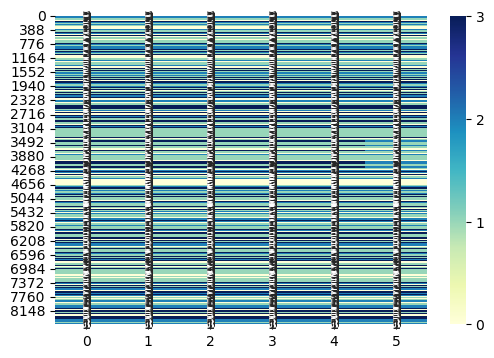

In [51]:
import seaborn as sns
plt.figure(figsize=(6,4))  # Thiết lập kích thước đồ thị
sns.heatmap(df_train_news.values, annot=True, cmap="YlGnBu", vmin=0, vmax=3, cbar_kws={'ticks': [0, 1, 2, 3]})  # annot=True hiển thị giá trị, cmap là bảng màu
plt.show()

In [31]:
# XGBClassifier
# from sklearn.model_selection import GridSearchCV
# meta_model = XGBClassifier()
# params = {
#     'n_estimators': [50,100,200],
#     'learning_rate': [0.01,0.05,0.1],
#     'max_depth': [1,10],
#     'min_child_weight':[1,10],
#     'gamma':[0.01,0.05],
# }
# GS = GridSearchCV(estimator=meta_model, param_grid=params, cv=4, verbose=5)
# GS.fit(train_news_final, y_train)
# GS.best_estimator_

In [32]:
# XGBClassifier
# from sklearn.model_selection import GridSearchCV
# meta_model = SVC()
# params = {
#     'kernel': ['rbf', 'sigmoid', 'poly', 'linear'],
#     'C': [0.005,0.01, 0.05],
#     'gamma': ['scale', 'auto'],
#     'probability': [True]
# }
# GS = GridSearchCV(estimator=meta_model, param_grid=params, cv=4, verbose=5)
# GS.fit(train_news_final, y_train)
# GS.best_estimator_

In [33]:
# # RandomForest
# from sklearn.model_selection import GridSearchCV
# meta_model = AdaBoostClassifier()
# params = {
#     'n_estimators': [70,80,90],
#     'learning_rate': [0.2, 0.3, 0.4],
#     'algorithm': ['SAMME', 'SAMME.R'],
# }
# GS = GridSearchCV(estimator=meta_model, param_grid=params, cv=3, verbose=5)
# GS.fit(train_news_final, y_train)
# GS.best_estimator_

In [34]:
# RandomForest
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import GridSearchCV
# meta_model = RandomForestClassifier()
# params = {
#     'n_estimators': [10,50,100,500],
#     'criterion': ['gini', 'entropy', 'log_loss'],
#     'max_depth': [3,4,5],
#     'max_features':['sqrt', 'log2'],
# }
# GS = GridSearchCV(estimator=meta_model, param_grid=params, cv=3, verbose=5)
# GS.fit(train_news_final, y_train)
# GS.best_estimator_

In [29]:
best_model = GS.best_estimator_
y_pred = best_model.predict(test_news_final)

In [36]:
GS.best_score_

0.9581925158471394

In [37]:
GS.best_params_

{'C': 0.05, 'max_iter': 20, 'penalty': 'l1', 'solver': 'saga'}

In [30]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,multilabel_confusion_matrix,f1_score,precision_score,accuracy_score,recall_score,precision_recall_fscore_support
def evaluation_test(y,y_pred):
    cm = confusion_matrix(y,y_pred)
    disp = ConfusionMatrixDisplay(cm,display_labels=['AFIB','SB','SR','GSVT'])
    disp.plot()
    plt.show()
    n_classes = len(cm)
    result = []
    for c in range(n_classes):
        tp = cm[c,c]
        fp = sum(cm[:,c]) - cm[c,c]
        fn = sum(cm[c,:]) - cm[c,c]
        tn = sum(np.delete(sum(cm)-cm[c,:],c))
        acc = (tp+tn) / (tp+fn+tn+fp)
        recall = tp/(tp+fn)
        precision = tp/(tp+fp)
        specificity = tn/(tn+fp)
        f1_score = 2*((precision*recall)/(precision+recall))
        if c+1 == 1:
            Rhythm = 'AFIB'
        elif c+1 == 2:
            Rhythm = 'SB'
        elif c+1 == 3:
            Rhythm = 'SR'
        else:
            Rhythm = 'GSVT'
        result.append([Rhythm,acc,recall,precision,f1_score,specificity])
    p_macro,r_macro,f_macro,support_macro = precision_recall_fscore_support(y,y_pred,average='macro')
    p_micro,r_micro,f_micro,support_micro = precision_recall_fscore_support(y,y_pred,average='micro')
    p_weighted,r_weighted,f_weighted,support_weighted = precision_recall_fscore_support(y,y_pred,average='weighted')
    result.append(['macro avg',None,f_macro,p_macro,r_macro,None])
    result.append(['micro avg',None,f_micro,p_micro,r_micro,None])
    result.append(['weighted avg',None,f_weighted,p_weighted,r_weighted,None])
    return result
        

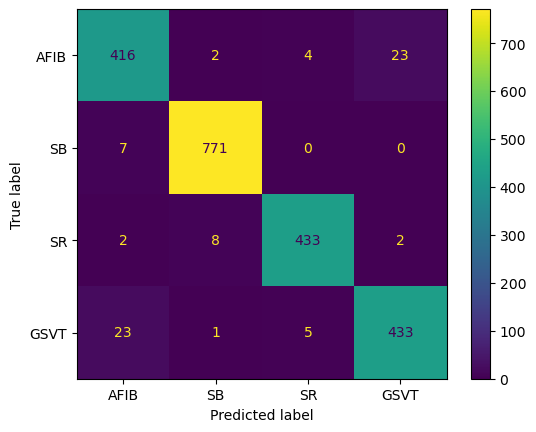

,Rhythm Group,ACC,F1-score,Precision,Recall,specificity
0,AFIB,0.971362,0.934831,0.928571,0.931691,0.981009
1,SB,0.991549,0.991003,0.985934,0.988462,0.991864
2,SR,0.990141,0.973034,0.979638,0.976325,0.994659
3,GSVT,0.974648,0.937229,0.945415,0.941304,0.985012
4,macro avg,NaN,0.959445,0.959889,0.959024,NaN
5,micro avg,NaN,0.963850,0.963850,0.963850,NaN
6,weighted avg,NaN,0.963837,0.963846,0.963850,NaN


In [31]:
evaluation_test = evaluation_test(y_test,y_pred)
df_evaluation_test = pd.DataFrame(data=evaluation_test,columns=["Rhythm Group","ACC","F1-score","Precision","Recall","specificity"])
df_evaluation_test

In [32]:
df_evaluation_test.to_csv("../Result/Stacking_class3.csv")